# **Web Scraping and Text Analysis** 
**BY ADITYA DAMAR JATI**
| [Linkedin](https://www.linkedin.com/in/adityadj/) | [Medium](https://medium.com/@adityadj) |  [Quora](https://id.quora.com/profile/Aditya-Damar-Jati)

## **PROLOG**
Web scraping, text analysis, sentiment analysis, bigram, and trigram are all important techniques in natural language processing. Web scraping is the process of extracting data from websites, which is useful for collecting data to perform text analysis. Text analysis is the process of extracting meaningful information from text data, such as identifying patterns or sentiments. Sentiment analysis is a type of text analysis that involves determining the emotional tone of a piece of text.

Bigrams and trigrams are types of n-grams, which are sequences of n words from a given text. Bigrams are sequences of two words, while trigrams are sequences of three words. These can be useful for identifying patterns in language use or for training language models.

One application of these techniques is in analyzing reviews of products or services. For example, we can use web scraping to collect reviews of a particular airline, such as Emirates Airlines, from websites like TripAdvisor or Airline Quality. Once we have collected the reviews, we can use text analysis to identify patterns in the language used by customers. This might include identifying frequently used words or phrases, or identifying common complaints or praises.

We can also use sentiment analysis to determine the overall emotional tone of the reviews. This can help us identify trends in customer satisfaction or dissatisfaction, which can be useful for improving customer service or making other changes to the airline's operations.

Now, let's take an example of a project that uses web scraping, text analysis, and sentiment analysis. Suppose we want to analyze customer reviews of Emirates Airlines to understand their satisfaction levels and identify any common complaints. We can use web scraping to extract the customer reviews from the Emirates Airlines website, and then use text analysis techniques such as bigram and trigram analysis to identify frequently occurring phrases and patterns in the text. Finally, we can use sentiment analysis to classify each review as positive, negative, or neutral based on the overall sentiment expressed in the text. This type of analysis can provide valuable insights into customer satisfaction and help Emirates Airlines improve their services. Lets try to use data from `https://www.airlinequality.com/airline-reviews/emirates`

### Scraping data from airlinequality.com

In this code, I will use several packages: requests, BeautifulSoup, and pandas.

Firstly, I will use the requests package to send HTTP requests to the website, and receive the response. Then, I will use BeautifulSoup, a library for web scraping, to parse the HTML content of the webpage and extract the text data from the reviews. Lastly, I will use pandas to create a dataframe of the reviews.

The purpose of this code is to scrape reviews for Emirates Airlines from the website `airlinequality.com`. The base_url is set to the Emirates Airlines page on the website, and the variables pages and page_size are set to determine the number of pages and reviews to scrape.

In the for loop, I will iterate through the specified number of pages and collect the HTML data from each page using requests.get(). Then, I will parse the content using BeautifulSoup, and extract the review text from each "div" tag with class "text_content". Finally, I will append the reviews to a list, and print the total number of reviews collected after each iteration.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/emirates/"
pages = 10
page_size = 1000

reviews = []

# now this is scraping code :
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from the chosen page
    response = requests.get(url)

    # Parse the content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 2241 total reviews
Scraping page 4
   ---> 2241 total reviews
Scraping page 5
   ---> 2241 total reviews
Scraping page 6
   ---> 2241 total reviews
Scraping page 7
   ---> 2241 total reviews
Scraping page 8
   ---> 2241 total reviews
Scraping page 9
   ---> 2241 total reviews
Scraping page 10
   ---> 2241 total reviews


In [3]:
# Finally (for scraping) we save the result in data frame using pandas
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Due to my physical conditio...
1,✅ Trip Verified | \r\nI remember that we were ...
2,Not Verified | I was pleasantly surprised by ...
3,✅ Trip Verified | My son had vomited on a fli...
4,✅ Trip Verified | So we paid £4K for 4 ticket...


### Understanding the Pattern

After scrapping the data, analysis all of them and get the insight!

In [4]:
df

,reviews
0,✅ Trip Verified | Due to my physical conditio...
1,✅ Trip Verified | \r\nI remember that we were ...
2,Not Verified | I was pleasantly surprised by ...
3,✅ Trip Verified | My son had vomited on a fli...
4,✅ Trip Verified | So we paid £4K for 4 ticket...
...,...
2236,Cape Town to Bangkok-departed on time excellen...
2237,Flew 6 flights recently in business with Emira...
2238,The fleets are new comfy. Flew Narita-Dubai-Mu...
2239,NBO-SIN-NBO. First leg was alright but nothing...


There are 3 types of patterns that we must clean for this review:

#### First condition with `✅ Trip Verified |` words in every begining reviews
example :

`✅ Trip Verified | I remember that we were very satisfied with this airline until a few years ago. But now it has been 3 times that we are very dissatisfied with the quality of food and the number of times served on a long flight! Why should we feel hungry on such a long flight and when we asked for food, they only give a small packet of crackers and we have to wait for several hours until it is time to serve their disgusting food? It was not like that before, that's why we surprised!
`
#### Second condition with `Not Verified |` words in every begining reviews
Example :

`Not Verified | I was pleasantly surprised by level of service and experience on this flight. Everything went smooth, food was very tasty, great choices of dishes and beverages. Overall, staff was very helpful always trying to accommodate the customer needs`

#### Third condition with directly going to reviews
Example :

`Flew from Durban to London Gatwick via Dubai. The first leg of the flight was awful - seat backrest was broken staff could not fix it so they moved us to two different seats which were even worse with a solid lump at the base of the backrests that made it impossible to get comfortable in any position on this long flight. The second leg was great in a two-week old aircraft where we could finally sit in comfort. Unfortunately the Durban-Dubai experience has put me off Emirates.`

### Data Cleansing
In this part I try to removed unimportant part and focused on important part of data. The goal is to make well-clean data frame and ready to visualized

In [5]:
# So I want to removed the unimportant part using this code
def process_reviews(reviews):
    if reviews.startswith('✅ Trip Verified'):
        return reviews.split('|', 1)[1]
    elif reviews.startswith('Not Verified'):
        return reviews.split('|', 1)[1]
    else:
        return reviews

In [6]:
# Menerapkan fungsi process_reviews() pada kolom 'reviews' DataFrame
df['reviews'] = df['reviews'].apply(process_reviews)

In [7]:
# checking the result
df

,reviews
0,"Due to my physical condition, I fly in Busin..."
1,\r\nI remember that we were very satisfied wi...
2,I was pleasantly surprised by level of servi...
3,My son had vomited on a flight where my part...
4,So we paid £4K for 4 tickets to be upgraded ...
...,...
2236,Cape Town to Bangkok-departed on time excellen...
2237,Flew 6 flights recently in business with Emira...
2238,The fleets are new comfy. Flew Narita-Dubai-Mu...
2239,NBO-SIN-NBO. First leg was alright but nothing...


In [8]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Due to my physical condition, I fly in Busin...",Due to my physical condition I fly in Busines...
1,\r\nI remember that we were very satisfied wi...,I remember that we were very satisfied with t...
2,I was pleasantly surprised by level of servi...,I was pleasantly surprised by level of servic...
3,My son had vomited on a flight where my part...,My son had vomited on a flight where my partn...
4,So we paid £4K for 4 tickets to be upgraded ...,So we paid K for tickets to be upgraded to bu...


In [9]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)

df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"Due to my physical condition, I fly in Busin...",Due to my physical condition I fly in Busines...,"[(Due, a), (physical, a), (condition, n), (fly..."
1,\r\nI remember that we were very satisfied wi...,I remember that we were very satisfied with t...,"[(remember, v), (satisfied, a), (airline, n), ..."
2,I was pleasantly surprised by level of servi...,I was pleasantly surprised by level of servic...,"[(pleasantly, r), (surprised, v), (level, n), ..."
3,My son had vomited on a flight where my part...,My son had vomited on a flight where my partn...,"[(son, n), (vomited, v), (flight, n), (partner..."
4,So we paid £4K for 4 tickets to be upgraded ...,So we paid K for tickets to be upgraded to bu...,"[(paid, v), (K, n), (tickets, n), (upgraded, v..."


In [11]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Due to my physical condition, I fly in Busin...",Due to my physical condition I fly in Busines...,"[(Due, a), (physical, a), (condition, n), (fly...",Due physical condition fly Business always r...
1,\r\nI remember that we were very satisfied wi...,I remember that we were very satisfied with t...,"[(remember, v), (satisfied, a), (airline, n), ...",remember satisfied airline year ago time dis...
2,I was pleasantly surprised by level of servi...,I was pleasantly surprised by level of servic...,"[(pleasantly, r), (surprised, v), (level, n), ...",pleasantly surprise level service experience...
3,My son had vomited on a flight where my part...,My son had vomited on a flight where my partn...,"[(son, n), (vomited, v), (flight, n), (partner...",son vomit flight partner leave seat request ...
4,So we paid £4K for 4 tickets to be upgraded ...,So we paid K for tickets to be upgraded to bu...,"[(paid, v), (K, n), (tickets, n), (upgraded, v...",pay K ticket upgrade business class family w...


In [12]:
df[['reviews','Lemma']]


,reviews,Lemma
0,"Due to my physical condition, I fly in Busin...",Due physical condition fly Business always r...
1,\r\nI remember that we were very satisfied wi...,remember satisfied airline year ago time dis...
2,I was pleasantly surprised by level of servi...,pleasantly surprise level service experience...
3,My son had vomited on a flight where my part...,son vomit flight partner leave seat request ...
4,So we paid £4K for 4 tickets to be upgraded ...,pay K ticket upgrade business class family w...
...,...,...
2236,Cape Town to Bangkok-departed on time excellen...,Cape Town Bangkok depart time excellent IFE ...
2237,Flew 6 flights recently in business with Emira...,Flew flight recently business Emirates fligh...
2238,The fleets are new comfy. Flew Narita-Dubai-Mu...,fleet new comfy Flew Narita Dubai Munich Rom...
2239,NBO-SIN-NBO. First leg was alright but nothing...,NBO SIN NBO First leg alright nothing great ...


In [13]:
!pip install vaderSentiment


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Due to my physical condition, I fly in Busin...",Due to my physical condition I fly in Busines...,"[(Due, a), (physical, a), (condition, n), (fly...",Due physical condition fly Business always r...,0.1531,Neutral
1,\r\nI remember that we were very satisfied wi...,I remember that we were very satisfied with t...,"[(remember, v), (satisfied, a), (airline, n), ...",remember satisfied airline year ago time dis...,0.1779,Neutral
2,I was pleasantly surprised by level of servi...,I was pleasantly surprised by level of servic...,"[(pleasantly, r), (surprised, v), (level, n), ...",pleasantly surprise level service experience...,0.9022,Positive
3,My son had vomited on a flight where my part...,My son had vomited on a flight where my partn...,"[(son, n), (vomited, v), (flight, n), (partner...",son vomit flight partner leave seat request ...,0.5106,Positive
4,So we paid £4K for 4 tickets to be upgraded ...,So we paid K for tickets to be upgraded to bu...,"[(paid, v), (K, n), (tickets, n), (upgraded, v...",pay K ticket upgrade business class family w...,0.7579,Positive


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1407
Negative     620
Neutral      214
Name: Analysis, dtype: int64

In [16]:
# I created the following data frame as a benchmark as ready-clean data 
clean_df = pd.DataFrame(df['Lemma'].tolist(), columns=['reviews'])
clean_df

,reviews
0,Due physical condition fly Business always r...
1,remember satisfied airline year ago time dis...
2,pleasantly surprise level service experience...
3,son vomit flight partner leave seat request ...
4,pay K ticket upgrade business class family w...
...,...
2236,Cape Town Bangkok depart time excellent IFE ...
2237,Flew flight recently business Emirates fligh...
2238,fleet new comfy Flew Narita Dubai Munich Rom...
2239,NBO SIN NBO First leg alright nothing great ...


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# initiate object to  CountVectorizer
vectorizer = CountVectorizer()

# transform data to vector
X = vectorizer.fit_transform(clean_df['reviews'])

# caunting how many the word appear then sorted descending order
word_counts = dict(zip(vectorizer.get_feature_names(), X.sum(axis=0).tolist()[0]))
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# print the top ten the word that appears the most in the review just for checking
print(sorted_word_counts[:10])


[('flight', 4686), ('emirates', 3326), ('dubai', 2909), ('seat', 2221), ('service', 2137), ('time', 1671), ('good', 1577), ('food', 1507), ('crew', 1365), ('hour', 1306)]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
#Save them on pandas data frame
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
df_word_counts = pd.DataFrame(sorted_word_counts, columns=['Word', 'Frequency'])
df_word_counts

,Word,Frequency
0,flight,4686
1,emirates,3326
2,dubai,2909
3,seat,2221
4,service,2137
...,...,...
8217,zh,1
8218,zimbabwe,1
8219,zonal,1
8220,zoo,1


In [19]:
import re
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing text
clean_df['clean_reviews'] = clean_df['reviews'].apply(lambda x: re.sub(r'[^\w\s]','',x.lower()))

# Tokenization
clean_df['tokens'] = clean_df['clean_reviews'].apply(lambda x: x.split())

# Bigram
clean_df['bigrams'] = clean_df['tokens'].apply(lambda x: [x[i] + " " + x[i+1] for i in range(len(x)-1)])

# Counting bigram frequency
bigram_freq = Counter([item for sublist in clean_df['bigrams'] for item in sublist])

# Creating DataFrame for top 15 bigrams
bigrams_df = pd.DataFrame(bigram_freq.most_common(), columns=['Bigram', 'Frequency'])
bigrams_df


,Bigram,Frequency
0,via dubai,704
1,business class,674
2,cabin crew,551
3,fly emirates,409
4,verified review,379
...,...,...
104884,nice hand,1
104885,hand out,1
104886,out airline,1
104887,however think,1


In [20]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# create trigrams
trigrams_list = []
for review in clean_df['reviews']:
    review_trigrams = ngrams(review.split(), 3)
    trigrams_list.extend(review_trigrams)

# count trigrams and create dataframe
trigrams_counts = Counter(trigrams_list)
trigrams_df = pd.DataFrame.from_dict(trigrams_counts, orient='index', columns=['Frequency'])
trigrams_df.index = trigrams_df.index.map(' '.join)
trigrams_df.index.name = 'Trigram'
trigrams_df = trigrams_df.reset_index()

# sort by frequency
trigrams_df = trigrams_df.sort_values('Frequency', ascending=False)

# reset index
trigrams_df = trigrams_df.reset_index(drop=True)
trigrams_df

,Trigram,Frequency
0,via Dubai Emirates,104
1,time fly Emirates,49
2,Bangkok via Dubai,46
3,London via Dubai,41
4,business class seat,39
...,...,...
163231,Bangkok reassure would,1
163232,reassure would make,1
163233,make connection would,1
163234,connection would ground,1


### Visualization

Next I will present the data with python-visualization to make audience easy to understand

#### Sentiment Analysis

Using data  that has been created, `vader_counts` I try to create visualization using seaborn

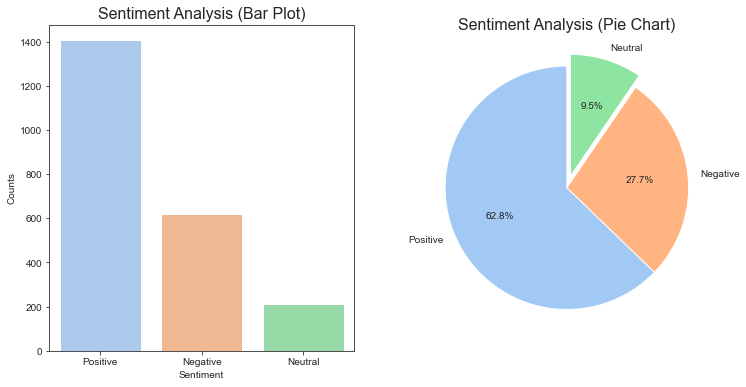

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')  # set background color to white
sns.set_palette('pastel')  # set palette color to 'pastel'

# membuat figure dan 2 axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# menggambar bar plot di axes pertama
sns.barplot(x=vader_counts.index, y=vader_counts.values, ax=ax1)
ax1.set_title('Sentiment Analysis (Bar Plot)', fontsize=16)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Counts')

# menggambar pie chart di axes kedua
labels = vader_counts.index
sizes = vader_counts.values
explode = (0, 0, 0.1)  # memberikan efek explode pada slice pertama
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sentiment Analysis (Pie Chart)', fontsize=16)

# menampilkan figure
plt.show()

#### Words Count, Bigram, Trigram

Using data frame that has been created, I try to visualized:

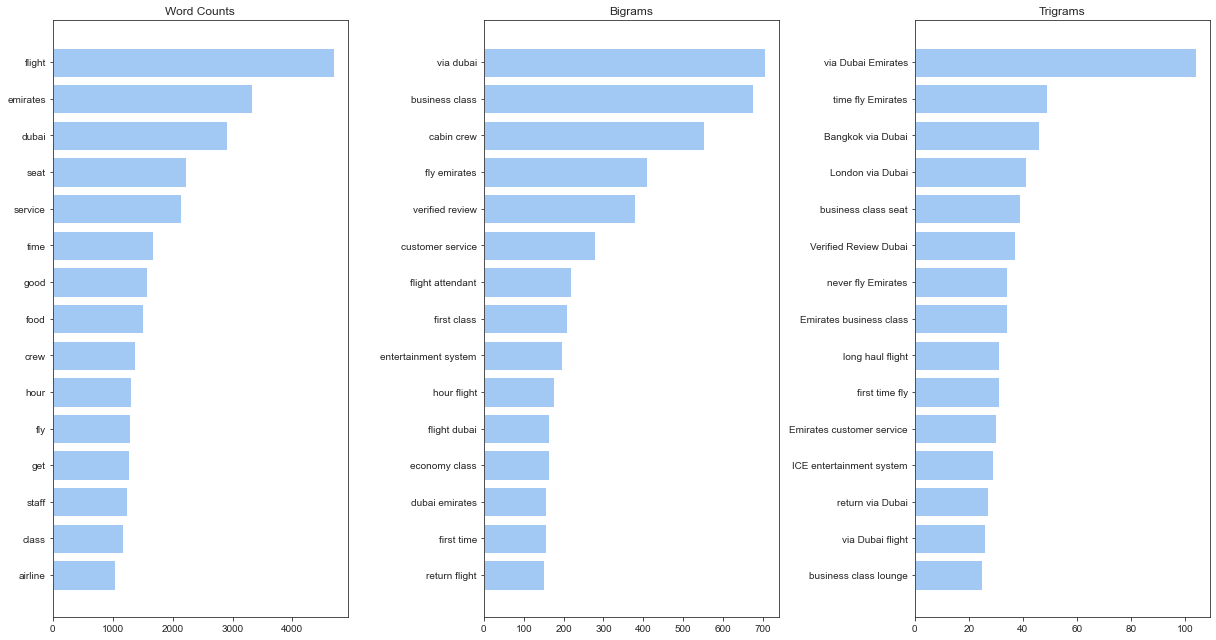

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,9))

# Data frame word counts for first plot
plt.subplot(1, 3, 1) 
plt.barh(df_word_counts['Word'][:15], df_word_counts['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Word Counts')

# Data frame bigram for 2nd plot
plt.subplot(1, 3, 2) 
plt.barh(bigrams_df['Bigram'][:15], bigrams_df['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Bigrams')

# Data frame trigram for the last plot
plt.subplot(1, 3, 3) 
plt.barh(trigrams_df['Trigram'][:15], trigrams_df['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Trigrams')

plt.tight_layout() # making distance between sub plot
plt.show()


For another level visualization, I try to visualized them using seaborn and more variation colors

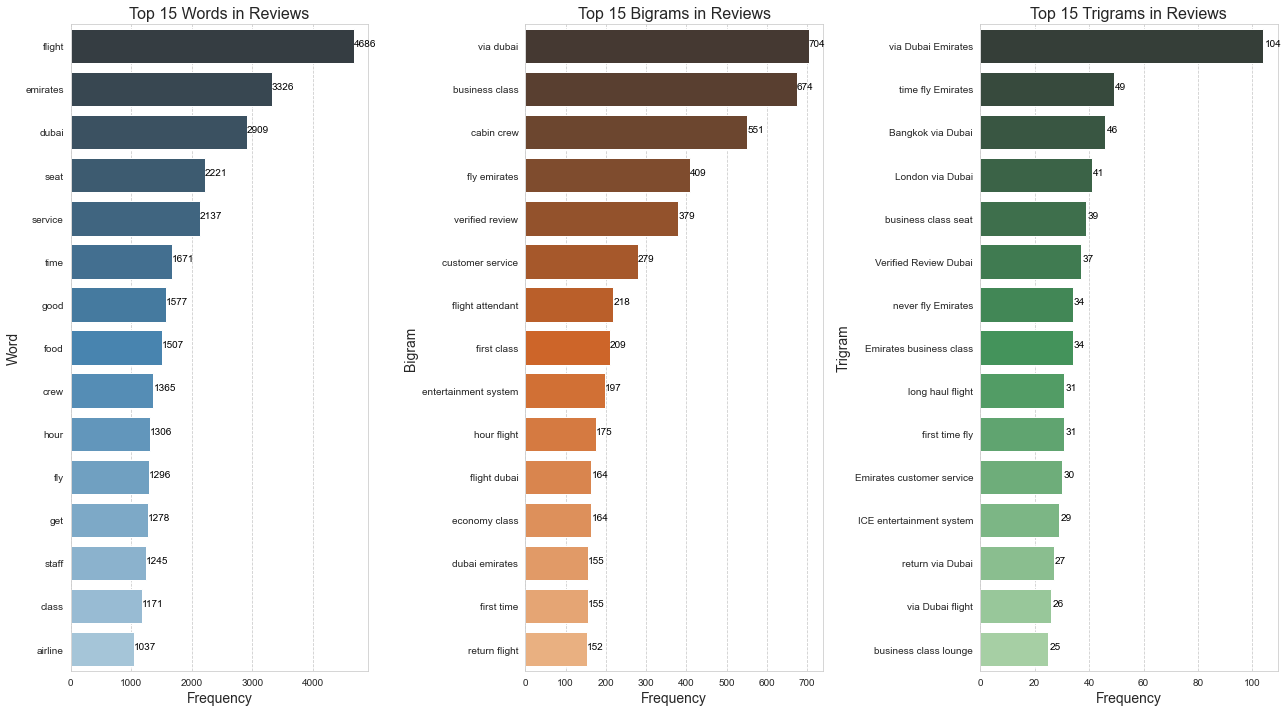

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting how many rows or data will be visualized
top_words = df_word_counts.nlargest(15, 'Frequency')
top_bigrams = bigrams_df.nlargest(15, 'Frequency')
top_trigrams = trigrams_df.nlargest(15, 'Frequency')

# Create figure
plt.figure(figsize=(18,10))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'alpha': 0.5})


# Data frame word counts for first plot
plt.subplot(1, 3, 1)
sns.barplot(x='Frequency', y='Word', data=top_words, palette= sns.color_palette("Blues_d", n_colors=15)[::-1])
plt.ylabel('Word', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Words in Reviews', fontsize=16)


# Give anotation number for every bar
for i, v in enumerate(top_words['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

# Barplot for bigram
plt.subplot(1, 3, 2) 
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette= sns.color_palette("Oranges_d", n_colors=15)[::-1])
plt.ylabel('Bigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Bigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_bigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

# Barplot for trigram
plt.subplot(1, 3, 3) 
sns.barplot(x='Frequency', y='Trigram', data=top_trigrams, palette= sns.color_palette("Greens_d", n_colors=15)[::-1])
plt.ylabel('Trigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Trigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_trigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

plt.tight_layout() # making distance between sub plot
plt.show()


### Conclusion

#### 1. Sentiment Analysis

    The given data represents the results of sentiment analysis of text reviews on Emirates Airlines' services. In this analysis, the text reviews were classified into three sentiment categories, namely positive, negative, and neutral.

    The data shows that out of all the reviews, 1407 were categorized as positive, 620 were categorized as negative, and 214 were categorized as neutral. This means that the majority of reviews about Emirates Airlines' services are positive.

This can be seen as an indication that most users of Emirates Airlines are satisfied with the services provided, including flight services and other services available at Emirates Airlines. However, although most of the reviews are positive, there is still a small percentage of reviews that are categorized as negative, which can be a consideration for Emirates Airlines to continue improving and enhancing the quality of the services provided.

#### 2. Top 15 Words in Reviews

    This data frame shows the most frequently occurring words in the analyzed text. From this data, we can see that the word "flight" appears the most, with a count of 4686, followed by "emirates" with a count of 3326, and "dubai" with a count of 2909. Other common words include "seat" (2221) and "service" (2137). Based on this analysis, we can conclude that the text primarily discusses experiences related to flying with Emirates and visiting Dubai.

#### 3. Top 15 Bigrams in Reviews

This data frame shows the most frequently occurring pairs of words in the analyzed text. From this data, we can see that the most common bigram is "via dubai" with a frequency of 704, followed by "business class" with a frequency of 674, and "cabin crew" with a frequency of 551. Other common bigrams include "fly emirates" (409) and "verified review" (379). Based on this analysis, we can conclude that the text primarily discusses experiences related to flying via Dubai with business class and interactions with the cabin crew.

#### 4. Top 15 Trigrams in Reviews

This data frame shows the most frequently occurring groups of three words in the analyzed text. From this data, we can see that the most common trigram is "via dubai emirates" with a frequency of 105, followed by "business class seat" with a frequency of 60, and "emirates business class" with a frequency of 56. Other common trigrams include "time fly emirates" (49) and "bangkok via dubai" (46). Based on this analysis, we can conclude that the text primarily discusses experiences related to flying via Dubai with business class, comfortable seating, and Emirates' services.

## **CLOSING**
In this project, we have conducted web scraping and text analysis on Emirates Airlines passenger reviews to gain deeper understanding of their experiences. By using text analysis techniques such as web scraping, text analysis, sentiment analysis, bigram, and trigram, we were able to determine the messages and sentiments conveyed in the reviews and identify patterns in the language used.

However, we recognize that this project has its limitations and shortcomings. Therefore, we apologize if there are any areas that are less satisfactory or could not be presented in full in this project.

We hope that this project can be beneficial to you and provide an overview of how text analysis can be used to understand the messages conveyed in customer reviews. Thank you for the opportunity and we hope that this project can be useful to you
<center> Best Regards, </center>
<center> Aditya D. Jati </center>


